해야 할 일은 캘리포니아 인구조사 데이터를 사용해 이 지역의 주택 가격 모델을 만드는 것입니다.

# 설정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


###런타임 다시 시작 후 한글 테스트

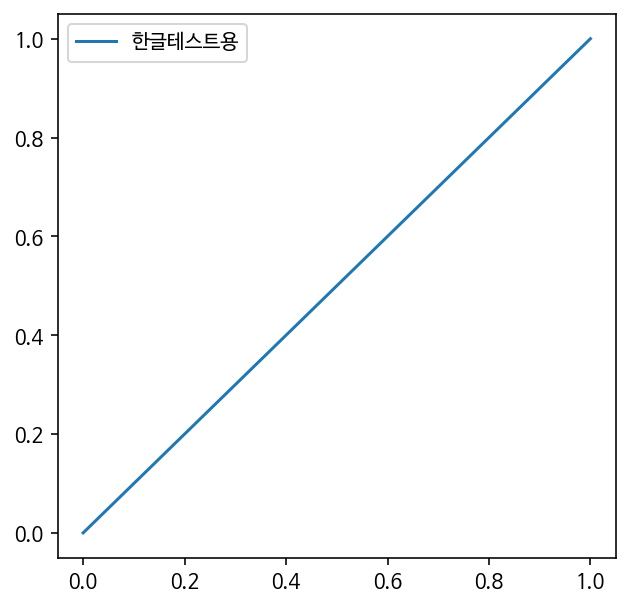

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

파이썬 2와 3을 모두 지원합니다. 공통 모듈을 임포트하고 맷플롯립 그림이 노트북 안에 포함되도록 설정하고 생성한 그림을 저장하기 위한 함수를 준비합니다:

In [3]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터 다운로드

In [4]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


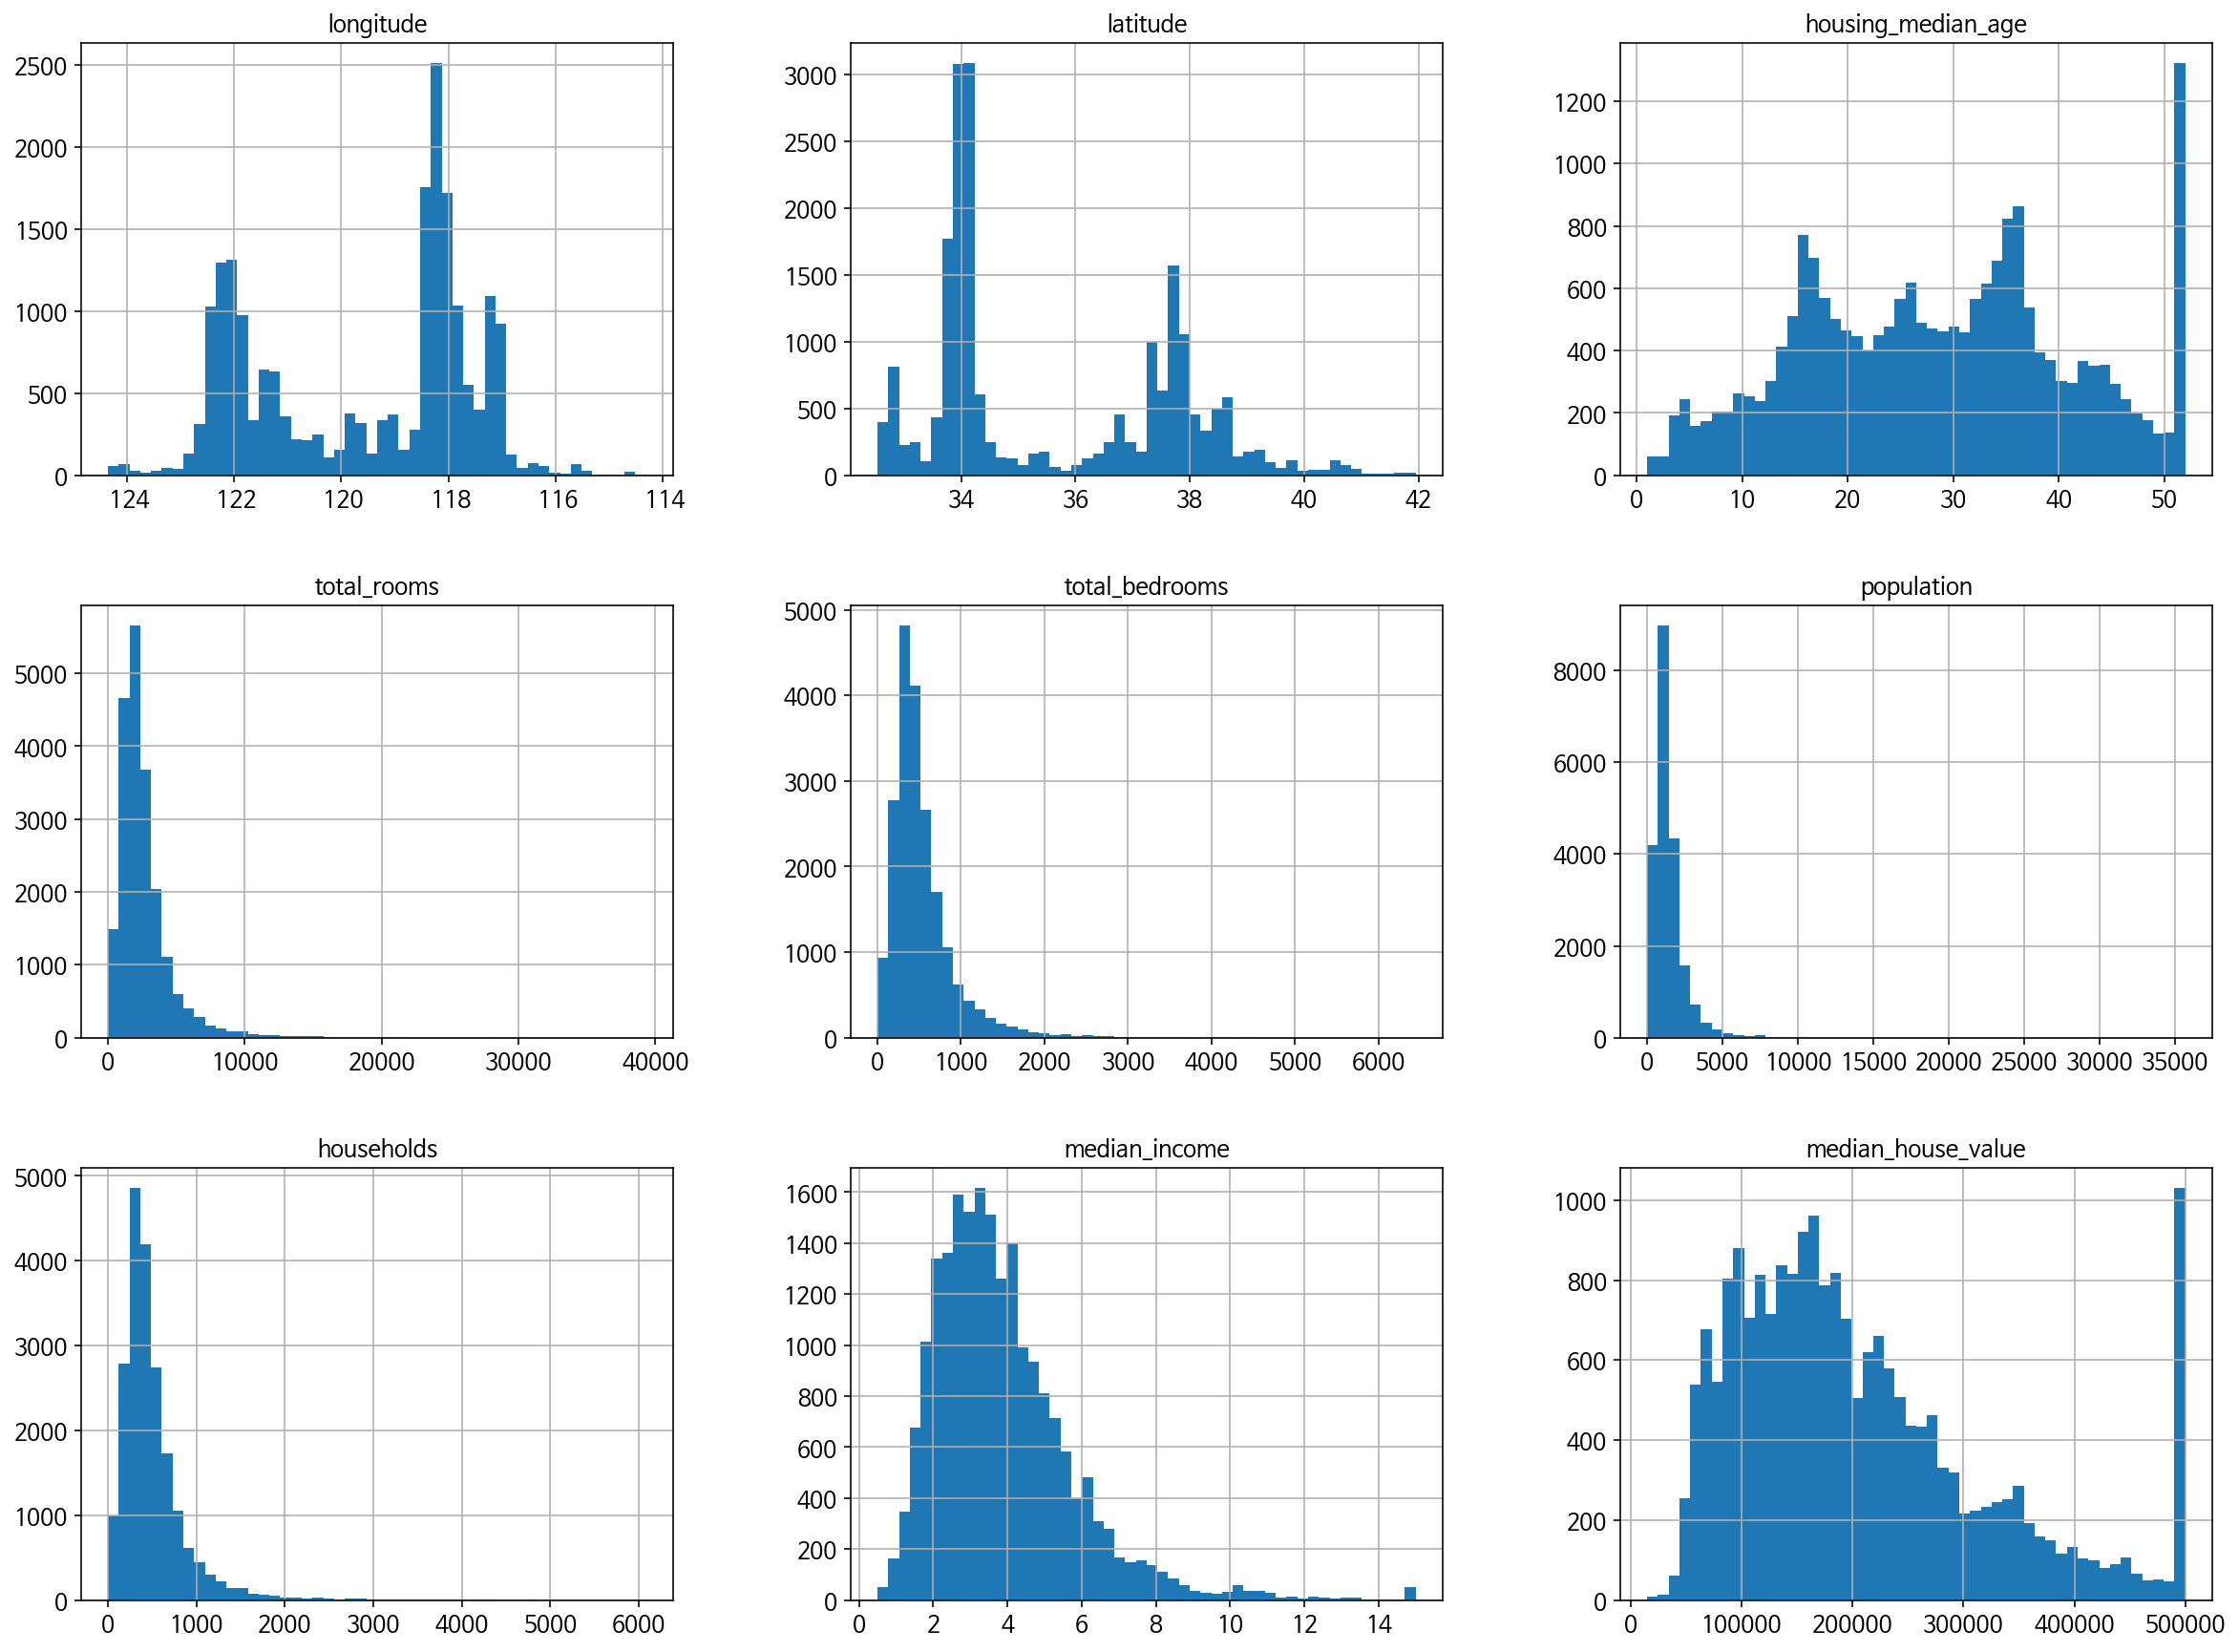

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 데이터 이해를 위한 탐색과 시각화

[Text(0, 0.5, '위도'), Text(0.5, 0, '경도')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


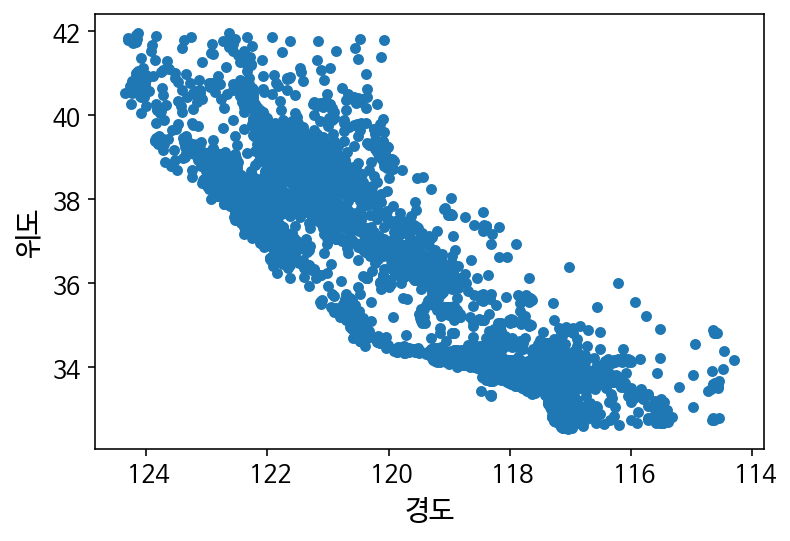

In [12]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도')

[Text(0, 0.5, '위도'), Text(0.5, 0, '경도')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


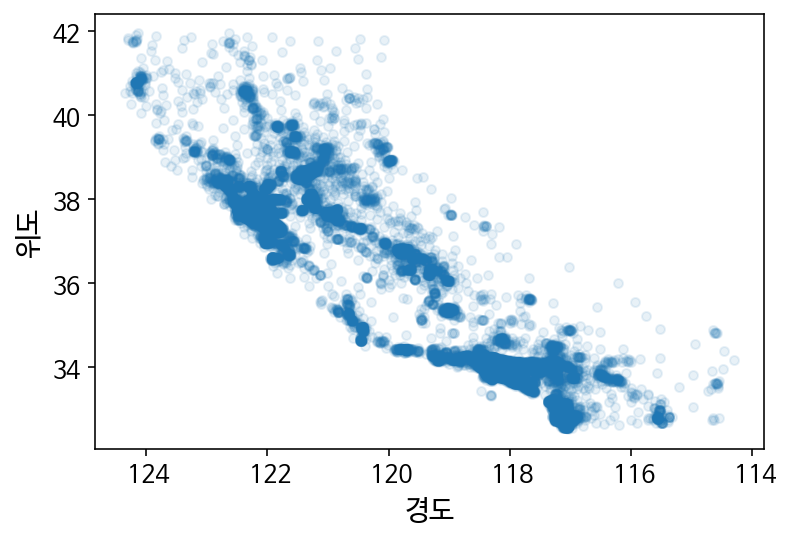

In [13]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


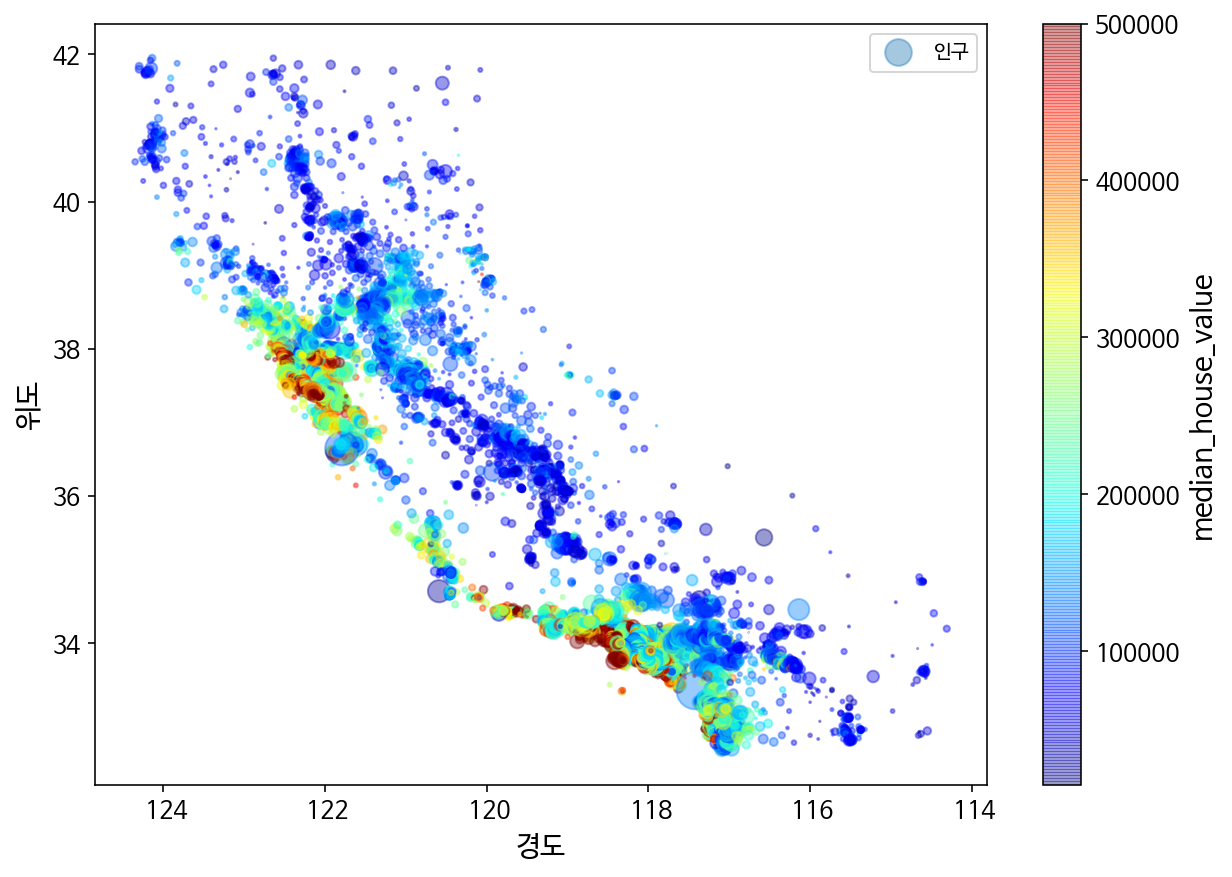

In [14]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf25b91f10>,
      dtype=object)

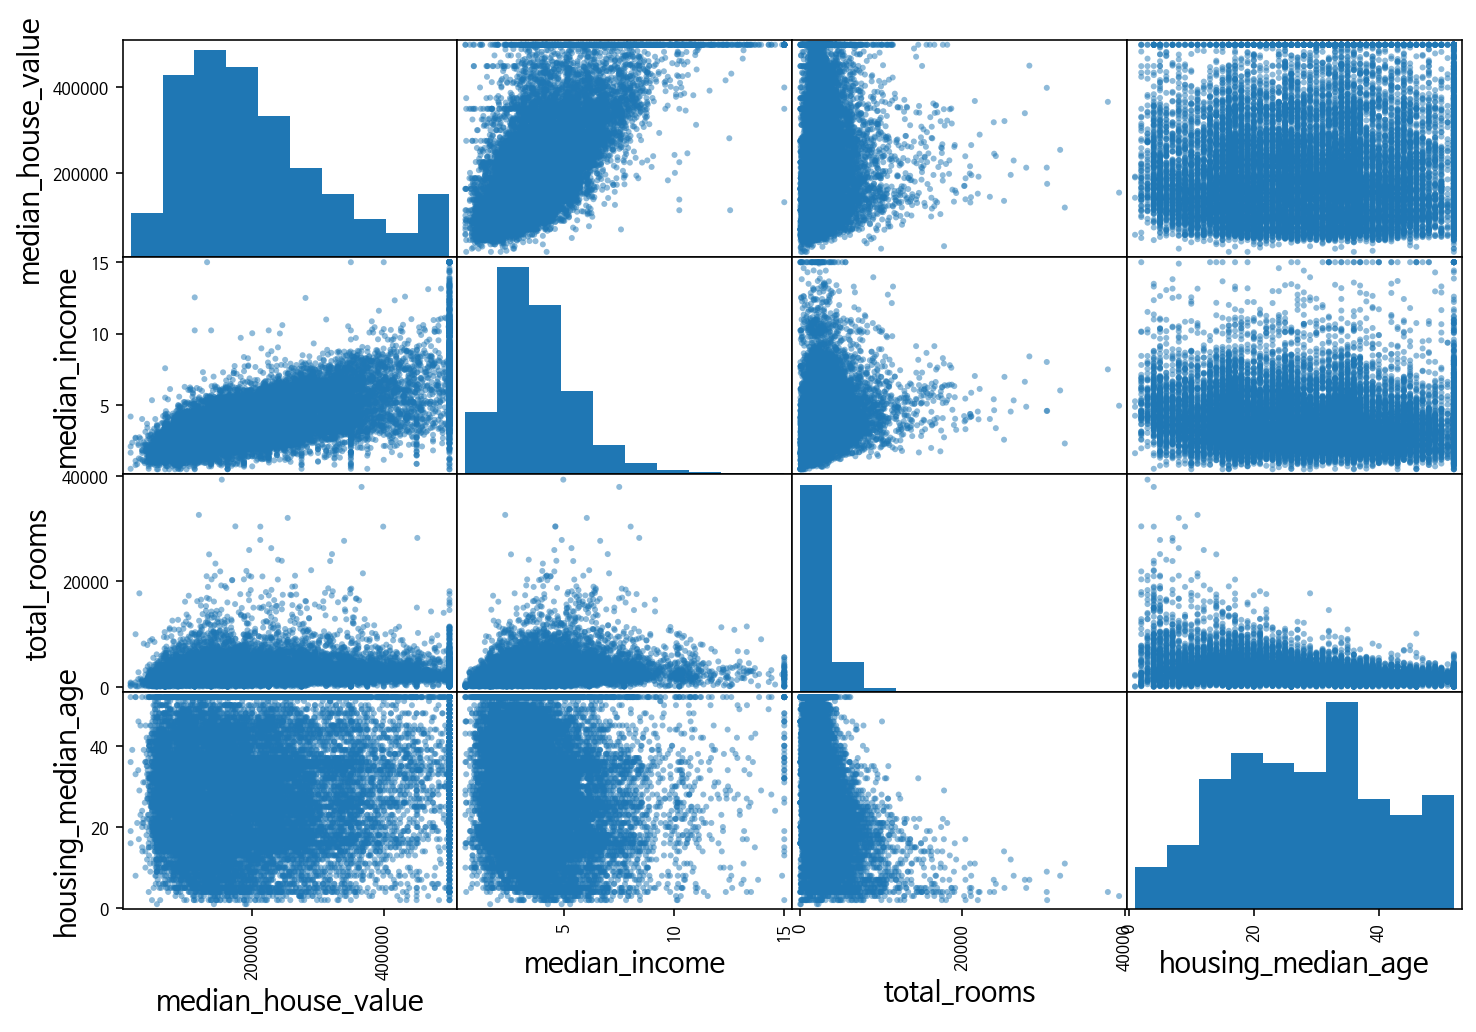

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

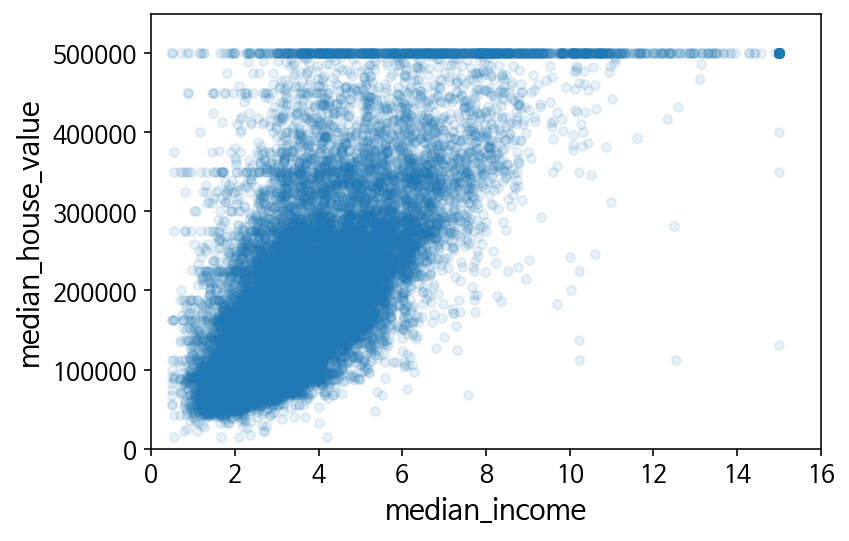

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [19]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

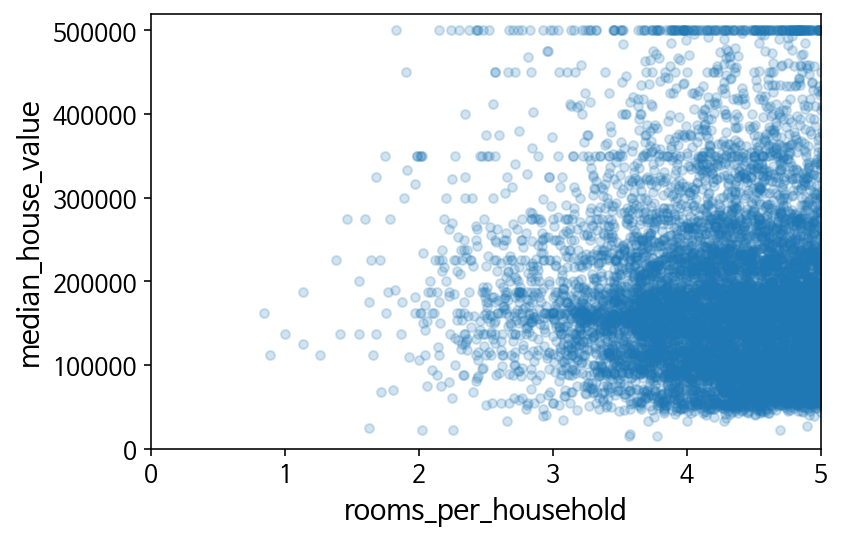

In [21]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [22]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 머신러닝 알고리즘을 위한 데이터 준비

In [23]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [24]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [25]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [26]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


`sklearn.preprocessing.Imputer` 클래스는 사이킷런 0.20 버전에서 사용 중지 경고가 발생하고 0.22 버전에서 삭제될 예정입니다. 대신 추가된 `sklearn.impute.SimpleImputer` 클래스를 사용합니다.

In [27]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제합니다:

In [28]:
housing_num = housing.drop('ocean_proximity', axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [29]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

각 특성의 중간 값이 수동으로 계산한 것과 같은지 확인해 보세요:

In [31]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

훈련 세트 변환:

In [32]:
X = imputer.transform(housing_num)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [34]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,5.761468,0.203162,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,3.830116,0.203162,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,4.048704,0.203162,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,6.102740,0.203162,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,4.633540,0.203162,2.403727


In [35]:
imputer.strategy

'median'

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


이제 범주형 입력 특성인 `ocean_proximity`을 전처리합니다:

### 방법

In [37]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

판다스의 `factorize()` 메소드는 문자열 범주형 특성을 머신러닝 알고리즘이 다루기 쉬운 숫자 범주형 특성으로 변환시켜 줍니다:

In [38]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

`OneHotEncoder`를 사용하여 범주형 값을 원-핫 벡터로 변경합니다:

사이킷런 0.20 버전에서 OneHotEncoder의 동작 방식이 변경되었습니다. 종전에는 0~최댓값 사이의 정수를 카테고리로 인식했지만 앞으로는 정수나 문자열에 상관없이 고유한 값만을 카테고리로 인식합니다. 경고 메세지를 피하기 위해 `categories` 매개변수를 `auto`로 설정합니다.

In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

`OneHotEncoder`는 기본적으로 희소 행렬을 반환합니다. 필요하면 밀집 배열로 변환할 수 있습니다:

In [41]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

기본 인코딩은 원-핫 벡터이고 희소 행렬로 반환됩니다. `toarray()` 메소드를 사용하여 밀집 배열로 바꿀 수 있습니다:

In [43]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

또는 encoding 매개변수를 `"onehot-dense"`로 지정하여 희소 행렬대신 밀집 행렬을 얻을 수 있습니다. 0.20 버전의 `OneHotEncoder`는 `sparse=Fasle` 옵션을 주어 밀집 행렬을 얻을 수 있습니다:

In [44]:
# cat_encoder = CategoricalEncoder(encoding="onehot-dense")
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Test Set 생성

-----

In [46]:
# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

In [47]:
import numpy as np

# 예시를 위해서 만든 것입니다. 사이킷런에는 train_test_split() 함수가 있습니다.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [48]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [49]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

위의 `test_set_check()` 함수는 파이썬 2와 파이썬 3에서 모두 작동되고 다음의 hashlib를 사용한 구현보다 훨씬 빠릅니다.

In [50]:
#import hashlib

#def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [51]:
# 이 버전의 test_set_check() 함수가 파이썬 2도 지원합니다.
#def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [52]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [53]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [54]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,2.771930,0.272152,1.649123,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,5.994652,0.188225,2.962567,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,5.869565,0.214815,3.739130,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,6.229508,0.250000,3.090164,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,6.986395,0.237585,3.346939,-122252.20


In [55]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [56]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,5.492991,NaN,2.483645


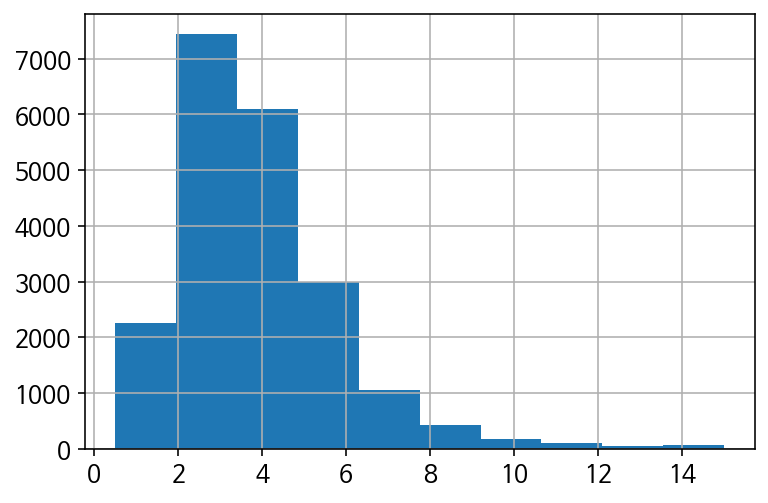

In [57]:
housing["median_income"].hist()

In [58]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [59]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

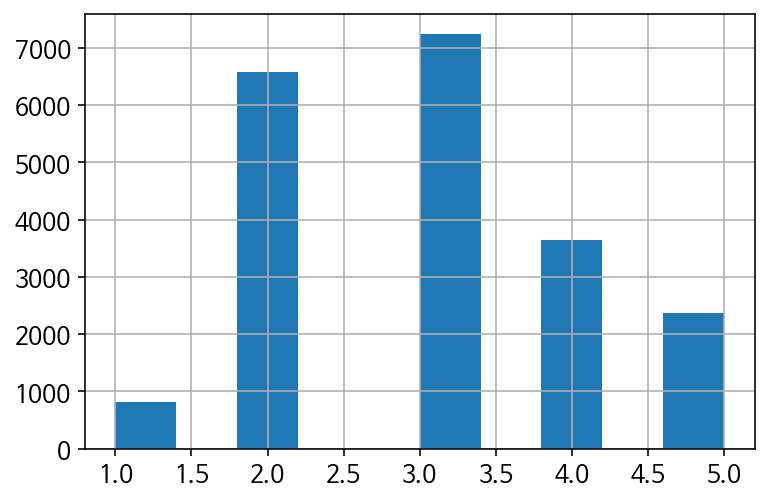

In [60]:
housing["income_cat"].hist()

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [62]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [63]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [64]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [65]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039971,0.040213,0.973236,0.364964
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [66]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [67]:
housing = strat_train_set.copy()

#Custom Transformers

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#Transformation Pipelines

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [70]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
            
        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self
        
    def transform(self, X):        
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
            
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
            else:
                X_mask[:, i] = valid_mask
                X[:, i][~valid_mask] = self.categories_[i][0]
                
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [73]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [74]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [75]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [76]:
housing_prepared.shape

(16512, 20)

# 모델 선택과 훈련

In [77]:
housing_labels = strat_train_set["median_house_value"].copy()

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

#Toy 데이터 셋 적재하기

## 샘플 데이터 셋 적재하기

### Boston house prices dataset

In [79]:
# 보스턴 데이터 셋 로드
from sklearn.datasets import load_boston

boston=load_boston()

boston.data.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

(506, 13)

In [80]:
boston_features=boston.data

boston_features[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [81]:
boston_features[0:4]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00]])

In [82]:
# head() 함수 이용해 행 조회
import pandas as pd
boston_df=pd.DataFrame(boston_features)

boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [83]:
boston_df.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


In [84]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [85]:
boston_df.columns

RangeIndex(start=0, stop=13, step=1)

### Diabetes 데이터 셋 로드

In [86]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
diabetes.data.shape

(442, 10)

### Optical recognition of handwritten digits데이터 셋 로드

<Figure size 432x288 with 0 Axes>

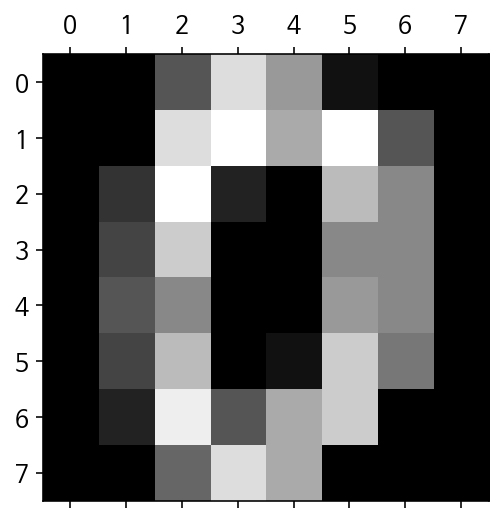

In [87]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()


In [88]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [89]:
# DESCR 키는 데이터셋에 대한 설명을 담고 있습니다.
digits['DESCR'][:70]

'.. _digits_dataset:\n\nOptical recognition of handwritten digits dataset'

### Wine recognition  dataset

In [90]:
from sklearn.datasets import load_wine
data=load_wine()
data.target[[10, 80, 140]]
list(data.target_names)

['class_0', 'class_1', 'class_2']

### iris 데이터 셋 로드

In [91]:
from sklearn.datasets import load_iris
iris_features=load_iris()

iris_features.data.shape

(150, 4)

In [92]:
iris_features.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [93]:
iris_features.target[[10,25,50]]

array([0, 0, 1])

In [94]:
list(iris_features.target_names)

['setosa', 'versicolor', 'virginica']

In [95]:
list(iris_features.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [96]:
print(iris_features)
print(iris_features.DESCR)
print(iris_features.data)
print(iris_features.feature_names)
print(iris_features.target)
print(iris_features.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [97]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=iris_features.data, columns=iris_features.feature_names)
df['target'] = iris_features.target
# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       se

### 모의 데이터 셋 만들기

In [98]:
# 사이킷런에 있는 데이터셋을 이용 모의 데이터셋 만들기

#1. make_regression을 이용한 선형회귀에 사용할 데이터 셋 만들기
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression

# 특성 행렬, 타깃 벡터, 정답 계수를 생성합니다.
features, target, coefficients = make_regression(n_samples = 100,
                                                 n_features = 3,
                                                 n_informative = 3,
                                                 n_targets = 1,
                                                 noise = 0.0,
                                                 coef = True,
                                                 random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [99]:
# 2. make_classification을 이용한 분류에 필요한 데이터셋 만들기

# 라이브러리를 임포트합니다.
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


In [100]:
# 3. make_blobs을 이용한 군집에 필요한 데이터 셋 만들기

# 라이브러리를 임포트합니다.
from sklearn.datasets import make_blobs

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


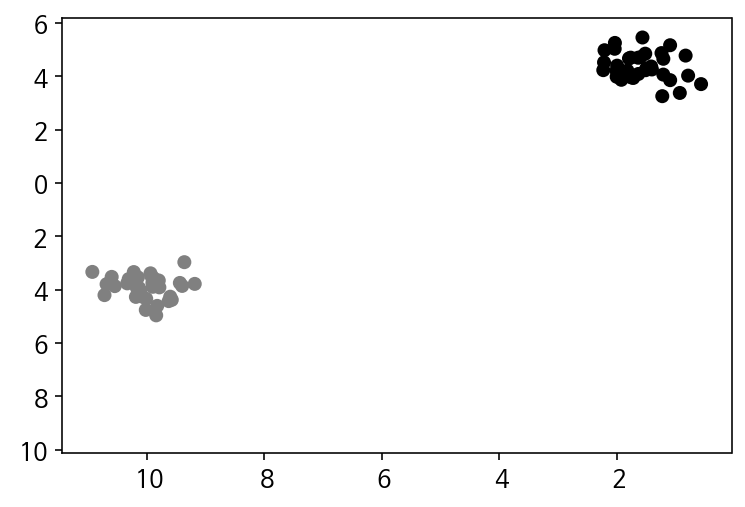

In [101]:
# 4. make_blobs을 이용한 군집 데이터 셋 그림으로 확인

import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

#파이썬으로 데이터 수집하기

In [109]:
#!/usr/bin/env python3
from math import exp, log, sqrt
import re
from datetime import date, time, datetime, timedelta
from operator import itemgetter
import sys

In [110]:
print("Output #143: ")
filereader = open("first_text.txt", 'r')
for row in filereader:
  print(row.strip())
filereader.close()

Output #143: 
I'm
already
much
better
at
Python.


In [111]:
my_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
max_index = len(my_letters)
filewriter = open("second_text.txt", 'w')
for index_value in range(len(my_letters)):
  if index_value < (max_index-1):
    filewriter.write(my_letters[index_value]+'\t')
  else:
      filewriter.write(my_letters[index_value]+'\n')
filewriter.close()
print("Output #146: Output written to file")

Output #146: Output written to file


In [112]:
my_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
max_index = len(my_numbers)
filewriter = open("third_text.csv", 'a')
for index_value in range(len(my_numbers)):
  if index_value < (max_index-1):
    filewriter.write(str(my_numbers[index_value])+',')
  else:
    filewriter.write(str(my_numbers[index_value])+'\n')
filewriter.close()
print("Output #147: Output appended to file")

Output #147: Output appended to file


In [113]:
F1=open("first_text.txt",'r')
line=F1.readline()
print(line)
F1.close()

I'm



In [114]:
F1=open("first_text.txt",'r')
while True:
  line=F1.readline()
  if not line:
    break
  print(line)
F1.close()

I'm

already 

much 

better 

at 

Python.



In [115]:
F2=open("first_text.txt",'r')
line=F2.read()
print(line)
F1.close()

I'm
already 
much 
better 
at 
Python.



In [116]:
F3=open("first_text.txt",'a')
for i in range(11,20):
  line = "%d번째 줄입니다. \n" % i
  F3.write(line)
F3.close()

In [117]:
F4=open("first_text.txt",'r')
line=F4.read()
print(line)
F1.close()

I'm
already 
much 
better 
at 
Python.
11번째 줄입니다. 
12번째 줄입니다. 
13번째 줄입니다. 
14번째 줄입니다. 
15번째 줄입니다. 
16번째 줄입니다. 
17번째 줄입니다. 
18번째 줄입니다. 
19번째 줄입니다. 



In [118]:
F5=open("noWith.txt",'w')
F5.write("Life is too short, you need python!!!")
F5.close()

In [119]:
with open("With.txt",'w') as F6:
  F6.write("Life is too short, you need python!!!")

###Quiz

In [3]:
input1 = int(input("첫번째 숫자를 입력하세요:"))
input2 = int(input("두번째 숫자를 입력하세요:"))

total = input1 + input2
print("두 수의 합은 %s입니다." % total)

첫번째 숫자를 입력하세요:5
두번째 숫자를 입력하세요:15
두 수의 합은 20입니다.


※ 에러 발생 시 런타임을 다시 시작하고 진행하시면 됩니다.

#Comma-Separated Values (CSV) Files

In [4]:
with open("supplier_data.csv", 'r', newline='') as filereader:
	with open("supplier_data_output1.csv", 'w', newline='') as filewriter:
		header = filereader.readline()
		header = header.strip()
		header_list = header.split(',')
		print(header_list)
		filewriter.write(','.join(map(str,header_list))+'\n')
		for row in filereader:
			row = row.strip()
			row_list = row.split(',')
			print(row_list)
			filewriter.write(','.join(map(str,row_list))+'\n')

['Supplier Name', 'Invoice Number', 'Part Number', 'Cost', 'Purchase Date']
['Supplier X', '001-1001', '2341', '$500.00', '1/20/14']
['Supplier X', '001-1001', '2341', '$500.00', '1/20/14']
['Supplier X', '001-1001', '5467', '$750.00', '1/20/14']
['Supplier X', '001-1001', '5467', '$750.00', '1/20/14']
['Supplier Y', '50-9501', '7009', '$250.00', '1/30/14']
['Supplier Y', '50-9501', '7009', '$250.00', '1/30/14']
['Supplier Y', '50-9505', '6650', '$125.00', '2/3/14']
['Supplier Y', '50-9505', '6650', '$125.00', '2/3/14']
['Supplier Z', '920-4803', '3321', '$615.00', '2/3/14']
['Supplier Z', '920-4804', '3321', '$615.00', '2/10/14']
['Supplier Z', '920-4805', '3321', '$615.00', '2/17/14']
['Supplier Z', '920-4806', '3321', '$615.00', '2/24/14']


In [ ]:
#!/usr/bin/env python3
import pandas as pd

data_frame = pd.read_csv("supplier_data.csv")
print(data_frame)
data_frame.to_csv("supplier_data_output2.csv", index=False)

   Supplier Name Invoice Number  Part Number     Cost Purchase Date
0     Supplier X       001-1001         2341  $500.00       1/20/14
1     Supplier X       001-1001         2341  $500.00       1/20/14
2     Supplier X       001-1001         5467  $750.00       1/20/14
3     Supplier X       001-1001         5467  $750.00       1/20/14
4     Supplier Y        50-9501         7009  $250.00       1/30/14
5     Supplier Y        50-9501         7009  $250.00       1/30/14
6     Supplier Y        50-9505         6650  $125.00        2/3/14
7     Supplier Y        50-9505         6650  $125.00        2/3/14
8     Supplier Z       920-4803         3321  $615.00        2/3/14
9     Supplier Z       920-4804         3321  $615.00       2/10/14
10    Supplier Z       920-4805         3321  $615.00       2/17/14
11    Supplier Z       920-4806         3321  $615.00       2/24/14


In [5]:
import csv

with open("supplier_data.csv", 'r', newline='') as csv_in_file:
	with open("supplier_data_output3.csv", 'w', newline='') as csv_out_file:
		filereader = csv.reader(csv_in_file)
		filewriter = csv.writer(csv_out_file)
		header = next(filereader)
		filewriter.writerow(header)
		for row_list in filereader:
			supplier = str(row_list[0]).strip()
			cost = str(row_list[3]).strip('$').replace(',', '')
			if supplier == 'Supplier Z' or float(cost) > 600.0:
				filewriter.writerow(row_list)

In [6]:
import pandas as pd

data_frame = pd.read_csv("supplier_data.csv")

data_frame['Cost'] = data_frame['Cost'].str.strip('$').astype(float)
data_frame_value_meets_condition = data_frame.loc[(data_frame['Supplier Name']\
.str.contains('Z')) | (data_frame['Cost'] > 600.0), :]

data_frame_value_meets_condition.to_csv("supplier_data_output4.csv", index=False)

In [7]:
important_dates = ['1/20/14', '1/30/14']

with open("supplier_data.csv", 'r', newline='') as csv_in_file:
	with open("supplier_data_output5.csv", 'w', newline='') as csv_out_file:
		filereader = csv.reader(csv_in_file)
		filewriter = csv.writer(csv_out_file)
		header = next(filereader)
		filewriter.writerow(header)
		for row_list in filereader:
			a_date = row_list[4]
			if a_date in important_dates:
				filewriter.writerow(row_list)

In [8]:
import pandas as pd

data_frame = pd.read_csv("supplier_data.csv")

important_dates = ['1/20/14', '1/30/14']
data_frame_value_in_set = data_frame.loc[data_frame['Purchase Date']\
.isin(important_dates), :]

data_frame_value_in_set.to_csv("supplier_data_output6.csv", index=False)

In [9]:
my_columns = [0, 3]

with open("supplier_data.csv", 'r', newline='') as csv_in_file:
	with open("supplier_data_output7.csv", 'w', newline='') as csv_out_file:
		filereader = csv.reader(csv_in_file)
		filewriter = csv.writer(csv_out_file)
		for row_list in filereader:
			row_list_output = [ ]
			for index_value in my_columns:
				row_list_output.append(row_list[index_value])
			filewriter.writerow(row_list_output)

In [10]:
import pandas as pd

data_frame = pd.read_csv("supplier_data.csv")
data_frame_column_by_index = data_frame.iloc[:, [0, 3]]

data_frame_column_by_index.to_csv("supplier_data_output8.csv", index=False)

In [11]:
my_columns = ['Invoice Number', 'Purchase Date']
my_columns_index = []

with open("supplier_data.csv", 'r', newline='') as csv_in_file:
	with open("supplier_data_output9.csv", 'w', newline='') as csv_out_file:
		filereader = csv.reader(csv_in_file)
		filewriter = csv.writer(csv_out_file)
		header = next(filereader)
		for index_value in range(len(header)):
			if header[index_value] in my_columns:
				my_columns_index.append(index_value)
		filewriter.writerow(my_columns)
		for row_list in filereader:
			row_list_output = [ ]
			for index_value in my_columns_index:
				row_list_output.append(row_list[index_value])
			filewriter.writerow(row_list_output)

In [12]:
import pandas as pd

data_frame = pd.read_csv("supplier_data.csv")
data_frame_column_by_name = data_frame.loc[:, ['Invoice Number', 'Purchase Date']]

data_frame_column_by_name.to_csv("supplier_data_output10.csv", index=False)

In [14]:
row_counter = 0
with open("supplier_data_unnecessary_header_footer.csv", 'r', newline='') as csv_in_file:
	with open("supplier_data_output11.csv", 'w', newline='') as csv_out_file:
		filereader = csv.reader(csv_in_file)
		filewriter = csv.writer(csv_out_file)
		for row in filereader:
			if row_counter >= 3 and row_counter <= 15:
				filewriter.writerow([value.strip() for value in row])
			row_counter += 1

In [15]:
import pandas as pd

data_frame = pd.read_csv("supplier_data_unnecessary_header_footer.csv", header=None)

data_frame = data_frame.drop([0,1,2,16,17,18])
data_frame.columns = data_frame.iloc[0]
data_frame = data_frame.reindex(data_frame.index.drop(3))

data_frame.to_csv("supplier_data_output12.csv", index=False)

In [16]:
with open("supplier_data_no_header_row.csv", 'r', newline='') as csv_in_file:
	with open("supplier_data_output13.csv", 'w', newline='') as csv_out_file:
		filereader = csv.reader(csv_in_file)
		filewriter = csv.writer(csv_out_file)
		header_list = ['Supplier Name', 'Invoice Number', \
					   'Part Number', 'Cost', 'Purchase Date']
		filewriter.writerow(header_list)
		for row in filereader:
			filewriter.writerow (row)

In [17]:
import pandas as pd

header_list = ['Supplier Name', 'Invoice Number', \
'Part Number', 'Cost', 'Purchase Date']
data_frame = pd.read_csv("supplier_data_no_header_row.csv", header=None, names=header_list)

data_frame.to_csv("supplier_data_output14.csv", index=False)

##Reading Multiple CSV Files

In [2]:
#!/usr/bin/env python3
import csv
import glob
import os

file_counter = 0
for input_file in glob.glob('multicsv/sales_*'):
	row_counter = 1
	with open(input_file, 'r', newline='') as csv_in_file:
		filereader = csv.reader(csv_in_file)
		header = next(filereader)
		for row in filereader:
			row_counter += 1
	print('{0!s}: \t{1:d} rows \t{2:d} columns'.format(\
	os.path.basename(input_file), row_counter, len(header)))
	file_counter += 1
print('Number of files: {0:d}'.format(file_counter))

sales_february_2014.csv: 	7 rows 	5 columns
sales_march_2014.csv: 	7 rows 	5 columns
sales_january_2014.csv: 	7 rows 	5 columns
Number of files: 3


In [3]:
#!/usr/bin/env python3
import csv
import glob
import os
import sys

first_file = True
for input_file in glob.glob('multicsv/sales_*'):
	print(os.path.basename(input_file))
	with open(input_file, 'r', newline='') as csv_in_file:
		with open("supplier_data_output15.csv", 'a', newline='') as csv_out_file:
			filereader = csv.reader(csv_in_file)
			filewriter = csv.writer(csv_out_file)
			if first_file:
				for row in filereader:
					filewriter.writerow(row)
				first_file = False
			else:
				header = next(filereader)
				for row in filereader:
					filewriter.writerow(row)

sales_february_2014.csv
sales_march_2014.csv
sales_january_2014.csv


In [4]:
import pandas as pd
import glob
import os
import sys

all_files = glob.glob('multicsv/sales_*')

all_data_frames = []
for file in all_files:
	data_frame = pd.read_csv(file, index_col=None)
	all_data_frames.append(data_frame)
data_frame_concat = pd.concat(all_data_frames, axis=0, ignore_index=True)

data_frame_concat.to_csv("supplier_data_output16.csv", index = False)

In [5]:
#!/usr/bin/env python3
import csv
import glob
import os
import string

output_header_list = ['file_name', 'total_sales', 'average_sales']

csv_out_file = open("supplier_data_output17.csv", 'a', newline='')
filewriter = csv.writer(csv_out_file)
filewriter.writerow(output_header_list)

for input_file in glob.glob('multicsv/sales_*'):
	with open(input_file, 'r', newline='') as csv_in_file:
		filereader = csv.reader(csv_in_file)
		output_list = [ ]
		output_list.append(os.path.basename(input_file))
		header = next(filereader)
		total_sales = 0.0
		number_of_sales = 0.0
		for row in filereader:
			sale_amount = row[3]
			total_sales += float(str(sale_amount).strip('$').replace(',',''))
			number_of_sales += 1.0
		average_sales = '{0:.2f}'.format(total_sales / number_of_sales)
		output_list.append(total_sales)
		output_list.append(average_sales)
		filewriter.writerow(output_list)
csv_out_file.close()


In [6]:
#!/usr/bin/env python3
import pandas as pd
import glob
import os

all_files = glob.glob('multicsv/sales_*')
all_data_frames = []
for input_file in all_files:
	data_frame = pd.read_csv(input_file, index_col=None)
	
	total_sales = pd.DataFrame([float(str(value).strip('$').replace(',','')) \
						for value in data_frame.loc[:, 'Sale Amount']]).sum()
	
	average_sales = pd.DataFrame([float(str(value).strip('$').replace(',','')) \
						for value in data_frame.loc[:, 'Sale Amount']]).mean()

	data = {'file_name': os.path.basename(input_file),
			'total_sales': total_sales,
			'average_sales': average_sales}
	
	all_data_frames.append(pd.DataFrame(data, columns=['file_name', 'total_sales', 'average_sales']))

data_frames_concat = pd.concat(all_data_frames, axis=0, ignore_index=True)

data_frames_concat.to_csv("supplier_data_output18.csv", index = False)

Quizzes

In [9]:
import pandas as pd

url='diamonds.csv'
diamonds_df=pd.read_csv(url)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [11]:
print(diamonds_df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [12]:
diamonds_11=pd.read_csv(url, skiprows=range(1,11), nrows=5)
diamonds_11

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.30,Good,J,SI1,64.0,55,339,4.25,4.28,2.73
1,0.23,Ideal,J,VS1,62.8,56,340,3.93,3.90,2.46
2,0.22,Premium,F,SI1,60.4,61,342,3.88,3.84,2.33
3,0.31,Ideal,J,SI2,62.2,54,344,4.35,4.37,2.71
4,0.20,Premium,E,SI2,60.2,62,345,3.79,3.75,2.27


#Excel Files

In [25]:
import os

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]

In [26]:
#!/usr/bin/env python3
import sys
from xlrd import open_workbook

for i in file_list_py:
  workbook = open_workbook(path + i)
  
print('Number of worksheets:', workbook.nsheets)
for worksheet in workbook.sheets():
	print("Worksheet name:", worksheet.name, "\tRows:", \
			worksheet.nrows, "\tColumns:", worksheet.ncols)

Number of worksheets: 3
Worksheet name: january_2013 	Rows: 7 	Columns: 5
Worksheet name: february_2013 	Rows: 7 	Columns: 5
Worksheet name: march_2013 	Rows: 7 	Columns: 5


In [27]:
import xlrd

wb=xlrd.open_workbook("./xlsxdataset/sales_2013.xlsx")
ws=wb.sheet_by_index(0)

print(wb.sheet_names())

['january_2013', 'february_2013', 'march_2013']


##Processing a Single Worksheet

In [28]:
#!/usr/bin/env python3
import sys
from xlrd import open_workbook
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')

with workbook:
	worksheet = workbook.sheet_by_name('january_2013')
	for row_index in range(worksheet.nrows):
		for column_index in range(worksheet.ncols):
			output_worksheet.write(row_index, column_index, worksheet.cell_value(row_index, column_index))
output_workbook.save("sales_output1.xls")

In [29]:
#!/usr/bin/env python3
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')

with  workbook:
	worksheet = workbook.sheet_by_name('january_2013')
	for row_index in range(worksheet.nrows):
		row_list_output = []
		for col_index in range(worksheet.ncols):
			if worksheet.cell_type(row_index, col_index) == 3:
				date_cell = xldate_as_tuple(worksheet.cell_value\
					(row_index, col_index),workbook.datemode)
				date_cell = date(*date_cell[0:3]).strftime\
					('%m/%d/%Y')
				row_list_output.append(date_cell)
				output_worksheet.write(row_index, col_index, date_cell)
			else:
				non_date_cell = worksheet.cell_value\
					(row_index,col_index)
				row_list_output.append(non_date_cell)
				output_worksheet.write(row_index, col_index,\
					non_date_cell)
output_workbook.save("sales_output2.xls")

In [30]:
#!/usr/bin/env python3
import pandas as pd

data_frame = pd.read_excel('./xlsxdataset/sales_2013.xlsx', sheet_name='january_2013')

writer = pd.ExcelWriter("sales_output3.xlsx")
data_frame.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


##특정 행 필터링하기

In [31]:
#!/usr/bin/env python3
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')

sale_amount_column_index = 3
with workbook:
	worksheet = workbook.sheet_by_name('january_2013')
	data = []
	header = worksheet.row_values(0)
	data.append(header)
	for row_index in range(1,worksheet.nrows):
			row_list = []
			sale_amount = worksheet.cell_value(row_index, sale_amount_column_index)
			if sale_amount > 1400.0:
				for column_index in range(worksheet.ncols):
					cell_value = worksheet.cell_value(row_index,column_index)
					cell_type = worksheet.cell_type(row_index, column_index)
					if cell_type == 3:
						date_cell = xldate_as_tuple(cell_value,workbook.datemode)
						date_cell = date(*date_cell[0:3]).strftime('%m/%d/%Y')
						row_list.append(date_cell)
					else:
						row_list.append(cell_value)
			if row_list:
				data.append(row_list)

	for list_index, output_list in enumerate(data):
		for element_index, element in enumerate(output_list):
			output_worksheet.write(list_index, element_index, element)

output_workbook.save("sales_output4.xls")

In [32]:
#!/usr/bin/env python3
import pandas as pd

data_frame = pd.read_excel('./xlsxdataset/sales_2013.xlsx', sheet_name='january_2013', index_col=None)

data_frame_value_meets_condition = \
	data_frame[data_frame['Sale Amount'].astype(float) > 1400.0]

writer = pd.ExcelWriter("sales_output5.xlsx")
data_frame_value_meets_condition.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [33]:
#!/usr/bin/env python3
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')

important_dates = ['01/24/2013', '01/31/2013']

purchase_date_column_index = 4
with workbook:
	worksheet = workbook.sheet_by_name('january_2013')
	data = []
	header = worksheet.row_values(0)
	data.append(header)
	for row_index in range(1, worksheet.nrows):		
		purchase_datetime = xldate_as_tuple(worksheet.cell_value(row_index, purchase_date_column_index),workbook.datemode)
		purchase_date = date(*purchase_datetime[0:3]).strftime('%m/%d/%Y')
		row_list = []
		if purchase_date in important_dates:
			for column_index in range(worksheet.ncols):
				cell_value = worksheet.cell_value(row_index,column_index)
				cell_type = worksheet.cell_type(row_index, column_index)
				if cell_type == 3:
					date_cell = xldate_as_tuple(cell_value,workbook.datemode)
					date_cell = date(*date_cell[0:3]).strftime('%m/%d/%Y')
					row_list.append(date_cell)
				else:
					row_list.append(cell_value)
		if row_list:
			data.append(row_list)

	for list_index, output_list in enumerate(data):
		for element_index, element in enumerate(output_list):
			output_worksheet.write(list_index, element_index, element)

output_workbook.save("sales_output6.xls")

In [34]:
#!/usr/bin/env python3
import pandas as pd

data_frame = pd.read_excel('./xlsxdataset/sales_2013.xlsx', sheet_name='january_2013', index_col=None)


important_dates = ['01/24/2013','01/31/2013']
data_frame_value_in_set = data_frame[data_frame['Purchase Date'].isin(important_dates)]

writer = pd.ExcelWriter("sales_output7.xlsx")
data_frame_value_in_set.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


##특정 열 선택하기


In [35]:
#!/usr/bin/env python3
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)
  
output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')

my_columns = [1, 4]

with workbook:
	worksheet = workbook.sheet_by_name('january_2013')
	data = []
	for row_index in range(worksheet.nrows):
		row_list = []
		for column_index in my_columns:
			cell_value = worksheet.cell_value(row_index,column_index)
			cell_type = worksheet.cell_type(row_index, column_index)
			if cell_type == 3:
				date_cell = xldate_as_tuple(cell_value,workbook.datemode)
				date_cell = date(*date_cell[0:3]).strftime('%m/%d/%Y')
				row_list.append(date_cell)
			else:
				row_list.append(cell_value)
		data.append(row_list)

	for list_index, output_list in enumerate(data):
		for element_index, element in enumerate(output_list):
			output_worksheet.write(list_index, element_index, element)

output_workbook.save("sales_output8.xls")

In [36]:
#!/usr/bin/env python3
import pandas as pd

data_frame = pd.read_excel('./xlsxdataset/sales_2013.xlsx', sheet_name='january_2013', index_col=None)

data_frame_column_by_index = data_frame.iloc[:, [1, 4]]

writer = pd.ExcelWriter("sales_output9.xlsx")
data_frame_column_by_index.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [37]:
#!/usr/bin/env python3
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')

my_columns = ['Customer ID', 'Purchase Date']

with workbook:
	worksheet = workbook.sheet_by_name('january_2013')
	data = [my_columns]
	header_list = worksheet.row_values(0)
	header_index_list = []
	for header_index in range(len(header_list)):
		if header_list[header_index] in my_columns:
			header_index_list.append(header_index)
	for row_index in range(1,worksheet.nrows):
		row_list = []
		for column_index in header_index_list:
			cell_value = worksheet.cell_value(row_index,column_index)
			cell_type = worksheet.cell_type(row_index, column_index)
			if cell_type == 3:
				date_cell = xldate_as_tuple(cell_value,workbook.datemode)
				date_cell = date(*date_cell[0:3]).strftime('%m/%d/%Y')
				row_list.append(date_cell)
			else:
				row_list.append(cell_value)
		data.append(row_list)

	for list_index, output_list in enumerate(data):
		for element_index, element in enumerate(output_list):
			output_worksheet.write(list_index, element_index, element)


output_workbook.save("sales_output10.xls")

In [38]:
#!/usr/bin/env python3
import pandas as pd

data_frame = pd.read_excel('./xlsxdataset/sales_2013.xlsx', sheet_name='january_2013', index_col=None)

data_frame_column_by_name = data_frame.loc[:, ['Customer ID', 'Purchase Date']]

writer = pd.ExcelWriter("sales_output11.xlsx")
data_frame_column_by_name.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## 여러 개의 통합 문서 처리하기

In [39]:
#!/usr/bin/env python3
import glob
import os
import sys
from xlrd import open_workbook

workbook_counter = 0
for input_file in glob.glob('./xlsxdataset/*.xlsx'):
	workbook = open_workbook(input_file)
	print('Workbook: {}'.format(os.path.basename(input_file)))
	print('Number of worksheets: {}'.format(workbook.nsheets))
	for worksheet in workbook.sheets():
		print('Worksheet name:', worksheet.name, '\tRows:',\
				worksheet.nrows, '\tColumns:', worksheet.ncols)
	workbook_counter += 1
print('Number of Excel workbooks: {}'.format(workbook_counter))

Workbook: sales_2013.xlsx
Number of worksheets: 3
Worksheet name: january_2013 	Rows: 7 	Columns: 5
Worksheet name: february_2013 	Rows: 7 	Columns: 5
Worksheet name: march_2013 	Rows: 7 	Columns: 5
Workbook: sales_2014.xlsx
Number of worksheets: 3
Worksheet name: january_2014 	Rows: 7 	Columns: 5
Worksheet name: february_2014 	Rows: 7 	Columns: 5
Worksheet name: march_2014 	Rows: 7 	Columns: 5
Workbook: sales_2015.xlsx
Number of worksheets: 3
Worksheet name: january_2015 	Rows: 7 	Columns: 5
Worksheet name: february_2015 	Rows: 7 	Columns: 5
Worksheet name: march_2015 	Rows: 7 	Columns: 5
Number of Excel workbooks: 3


In [40]:
#!/usr/bin/env python3
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook
import os
from xlrd import open_workbook

path = './xlsxdataset/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]


for i in file_list_py:
  workbook = open_workbook(path + i)

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('all_data_all_workbooks')

data = []
first_worksheet = True
for input_file in glob.glob('./xlsxdataset/*.xlsx'):
  print(input_file)
  with workbook:
    for worksheet in workbook.sheets():
      if first_worksheet:
        header_row = worksheet.row_values(0)
        data.append(header_row)
        first_worksheet = False
      for row_index in range(1,worksheet.nrows):
        row_list = []
        for column_index in range(worksheet.ncols):
          cell_value = worksheet.cell_value(row_index,column_index)
          cell_type = worksheet.cell_type(row_index, column_index)          
          if cell_type == 3:
            date_cell = xldate_as_tuple(cell_value,workbook.datemode)
            date_cell = date(*date_cell[0:3]).strftime('%m/%d/%Y')
            row_list.append(date_cell)
          else:
            row_list.append(cell_value)
        data.append(row_list)

for list_index, output_list in enumerate(data):
	for element_index, element in enumerate(output_list):
		output_worksheet.write(list_index, element_index, element)

output_workbook.save("sales_output12.xls")

./xlsxdataset/sales_2013.xlsx
./xlsxdataset/sales_2014.xlsx
./xlsxdataset/sales_2015.xlsx


In [41]:
#!/usr/bin/env python3
import pandas as pd
import glob
import os

all_workbooks = glob.glob('./xlsxdataset/*.xlsx')
data_frames = []
for workbook in all_workbooks:
	all_worksheets = pd.read_excel(workbook, sheet_name=None, index_col=None)
	for worksheet_name, data in all_worksheets.items():
		data_frames.append(data)
all_data_concatenated = pd.concat(data_frames, axis=0, ignore_index=True)

writer = pd.ExcelWriter("sales_output13.xlsx")
all_data_concatenated.to_excel(writer, sheet_name='all_data_all_workbooks', index=False)
writer.save()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


##다른 파일의 경우

### Working with Excel Files

In [42]:
import pandas as pd
url='./diamonds.xlsx'
diamonds_xl=pd.read_excel(url, engine = 'openpyxl')
print(diamonds_xl)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [43]:
diamonds_xl.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### JSON Data

In [44]:
import csv
import json

csvfile=open('./diamonds.csv','r')
jsonfile=open('./diamonds.json','w')

fieldnames=("FirstName","LastName","IDNumber","Message")
reader=csv.DictReader(csvfile, fieldnames)

out=json.dumps([row for row in reader])
jsonfile.write(out)

7303173

In [45]:
import pandas as pd

url='./diamonds.json'

diamonds_json=pd.read_json(url, orient='columns')

diamonds_json.head(5)

,FirstName,LastName,IDNumber,Message,null
0,carat,cut,color,clarity,"[depth, table, price, x, y, z]"
1,0.23,Ideal,E,SI2,"[61.5, 55, 326, 3.95, 3.98, 2.43]"
2,0.21,Premium,E,SI1,"[59.8, 61, 326, 3.89, 3.84, 2.31]"
3,0.23,Good,E,VS1,"[56.9, 65, 327, 4.05, 4.07, 2.31]"
4,0.29,Premium,I,VS2,"[62.4, 58, 334, 4.2, 4.23, 2.63]"


### XML Data

In [46]:
from xml.etree import ElementTree as ET
tree = ET.parse('./Data.xml')
root = tree.getroot()
root.tag

'data'

In [47]:
root.attrib

{}

In [48]:
for child in root:
    print(child.tag, child.attrib)

country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}


In [50]:
import pandas as pd
diamonds_df=pd.read_csv("./diamonds.csv")
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Relational Databases: SQL

In [51]:
import sqlite3
print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.22.0


In [58]:
# DB 연결, 커서 획득
# DB 생성 (오토 커밋)
conn = sqlite3.connect("./test.db", isolation_level=None)
# 커서 획득
c = conn.cursor()

In [61]:
#기존 테이블 삭제
c.execute("DROP TABLE table1")

In [62]:
# 테이블 생성 (데이터 타입은 TEST, NUMERIC, INTEGER, REAL, BLOB 등)
c.execute("CREATE TABLE IF NOT EXISTS table1 \
    (id integer PRIMARY KEY, name text, birthday text)")

In [63]:
# 데이터 삽입 방법 1
c.execute("INSERT INTO table1 \
    VALUES(1, 'LEE', '1987-00-00')")

In [64]:
# 데이터 삽입 방법 2
c.execute("INSERT INTO table1(id, name, birthday) \
    VALUES(?,?,?)", \
    (2, 'KIM', '1990-00-00'))

In [65]:
test_tuple = (
    (3, 'PARK', '1991-00-00'),
    (4, 'CHOI', '1999-00-00'),
    (5, 'JUNG', '1989-00-00')
)
c.executemany("INSERT INTO table1(id, name, birthday) VALUES(?,?,?)", test_tuple)

In [66]:
# 데이터 불러오기
c.execute("SELECT * FROM table1")
print(c.fetchone())
print(c.fetchone())
print(c.fetchall())

(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
[(3, 'PARK', '1991-00-00'), (4, 'CHOI', '1999-00-00'), (5, 'JUNG', '1989-00-00')]


In [67]:
# 전체 데이터
c.execute("SELECT * FROM table1")
print(c.fetchall())

[(1, 'LEE', '1987-00-00'), (2, 'KIM', '1990-00-00'), (3, 'PARK', '1991-00-00'), (4, 'CHOI', '1999-00-00'), (5, 'JUNG', '1989-00-00')]


In [68]:
# 리스트 형태로 출력
# 방법 1
c.execute("SELECT * FROM table1")
for row in c.fetchall():
    print(row)
# 방법 2
for row in c.execute("SELECT * FROM table1 ORDER BY id ASC"):
    print(row)

(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'PARK', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'JUNG', '1989-00-00')
(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'PARK', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'JUNG', '1989-00-00')


In [69]:
# 데이터 수정

# 방법 1
c.execute("UPDATE table1 SET name=? WHERE id=?", ('NEW1', 1))
# 방법 2
c.execute("UPDATE table1 SET name=:name WHERE id=:id", {"name": 'NEW2', 'id': 3})
# 방법 3
c.execute("UPDATE table1 SET name='%s' WHERE id='%s'" % ('NEW3', 5))
# 확인
for row in c.execute('SELECT * FROM table1'):
    print(row)

(1, 'NEW1', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'NEW2', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'NEW3', '1989-00-00')


In [70]:
# 데이터 삭제하기

# 방법 1
c.execute("DELETE FROM table1 WHERE id=?", (1,))
# 방법 2
c.execute("DELETE FROM table1 WHERE id=:id", {'id': 3})
# 방법 3
c.execute("DELETE FROM table1 WHERE id='%s'" % 5)
# 확인
for row in c.execute('SELECT * FROM table1'):
    print(row)

(2, 'KIM', '1990-00-00')
(4, 'CHOI', '1999-00-00')


In [71]:
# DB 백업하기 (dump)

with conn:
    with open('dump.sql', 'w') as f:
        for line in conn.iterdump():
            f.write('%s\n' % line)
        print('Completed.')

Completed.


In [72]:
# DB 연결 해제
conn.close()

#데이터 다루기 개요

In [75]:
import csv

print("tab delimited stock prices:")

def process(date, symbol, price):
    print(date, symbol, price)


with open('tab_delimited_stock_prices.txt', 'r', encoding='utf8',newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

tab delimited stock prices:
6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


In [76]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    return [parser(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)

def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

In [77]:
!pip install python-dateutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import csv
import dateutil

data = []

with open("comma_delimited_stock_prices.csv", "r", encoding='utf8', newline='') as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

for row in data:
    if any(x is None for x in row):
        print(row)

[datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None]


In [80]:
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value
    
def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
             for field_name, value in input_dict.items() }

In [81]:
import csv
import dateutil

print("stocks")
with open("stocks.txt", "r", encoding='utf8', newline='') as f:
    reader = csv.DictReader(f, delimiter="\t")
    data = [parse_dict(row, { 'date' : dateutil.parser.parse,
                                  'closing_price' : float })
                for row in reader]

max_aapl_price = max(row["closing_price"]
                         for row in data
                         if row["symbol"] == "AAPL")
print("max aapl price", max_aapl_price)

stocks
max aapl price 119.0
